# $\tanh(x)$

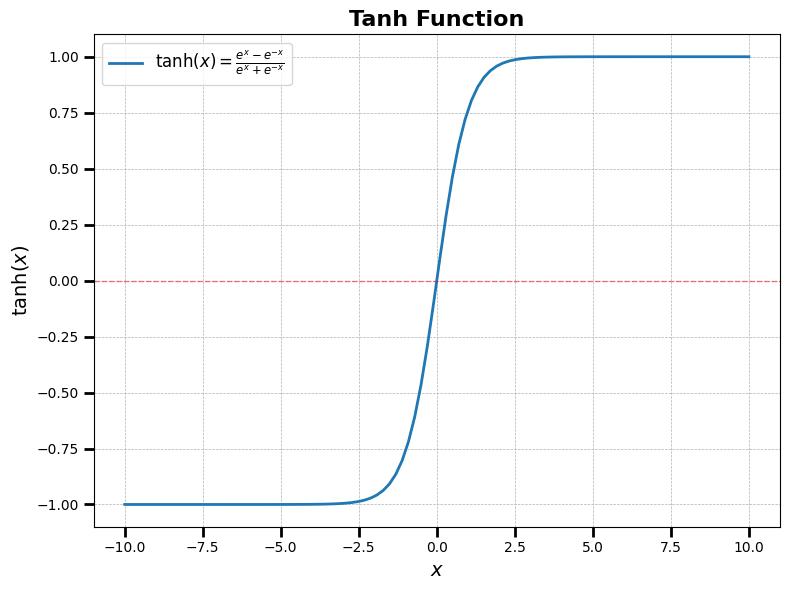

In [4]:
import numpy as np
import matplotlib.pyplot as plt
 
# 定义 Tanh 函数

def tanh(x):
    return np.tanh(x)

# 生成 x 值范围
x = np.linspace(-10, 10, 100)
y = tanh(x)

# 绘制 Tanh 曲线
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$', linewidth=2)
plt.title("Tanh Function", fontsize=16, fontweight='bold')
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$\tanh(x)$", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='gray')

# 添加水平参考线（y=0）
plt.axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# $\tanh'(x)$

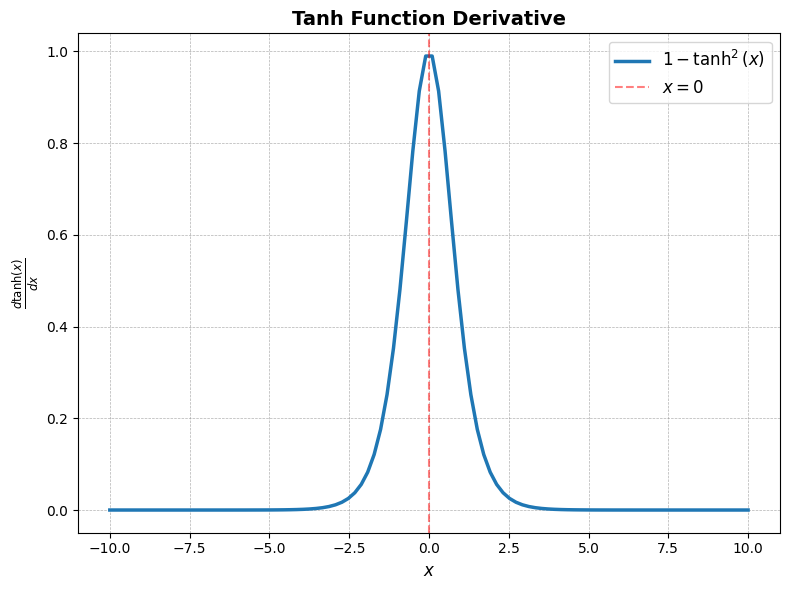

In [9]:
# 定义 Tanh 导数函数
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# 生成 x 值范围
x = np.linspace(-10, 10, 100)
dy = tanh_derivative(x)

# 绘制 Tanh 导数图
plt.figure(figsize=(8, 6))
plt.plot(x, dy, label=r"$ 1 - \tanh^2(x)$", linewidth=2.5)
plt.title("Tanh Function Derivative", fontsize=14, fontweight='bold')
plt.xlabel("$x$", fontsize=12)
plt.ylabel(r"$\frac{d\tanh(x)}{dx}$", fontsize=12)
plt.axvline(0, color='red', linestyle='--', alpha=0.5, label="$x=0$")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

# 生成二分类数据集
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# 数据标准化
scaler = StandardScaler()

# 没有 Tanh 变换的逻辑回归模型
model = Pipeline([
    ('scaler', scaler),
    ('classifier', LogisticRegression(max_iter=300, solver='lbfgs'))
])

# 训练模型并预测测试集
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_no_tanh = accuracy_score(y_test, y_pred)
print(f"没有 Tanh 变换的模型准确率: {accuracy_no_tanh:.2f}")

# 定义 Tanh 变换
def tanh_transform(x):
    return np.tanh(x)

tanh_transformer = FunctionTransformer(tanh_transform)

# 包含 Tanh 变换的逻辑回归模型
model_with_tanh = Pipeline([
    ('scaler', scaler),
    ('tanh_transformer', tanh_transformer),
    ('classifier', LogisticRegression(max_iter=300, solver='lbfgs'))
])

# 训练模型并预测
model_with_tanh.fit(X_train, y_train)
y_pred_tanh = model_with_tanh.predict(X_test)
accuracy_with_tanh = accuracy_score(y_test, y_pred_tanh)
print(f"Tanh 变换后的模型准确率: {accuracy_with_tanh:.2f}")

没有 Tanh 变换的模型准确率: 0.90
Tanh 变换后的模型准确率: 0.90


# ReLU

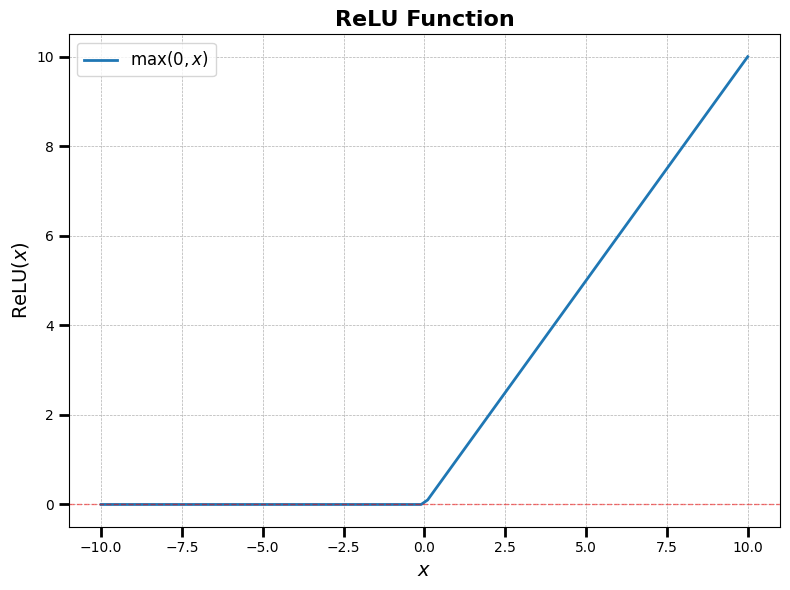

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 ReLU 函数
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$ \max(0, x)$', linewidth=2)
plt.title("ReLU Function", fontsize=16, fontweight='bold')
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$\text{ReLU}(x)$", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='gray')
plt.axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

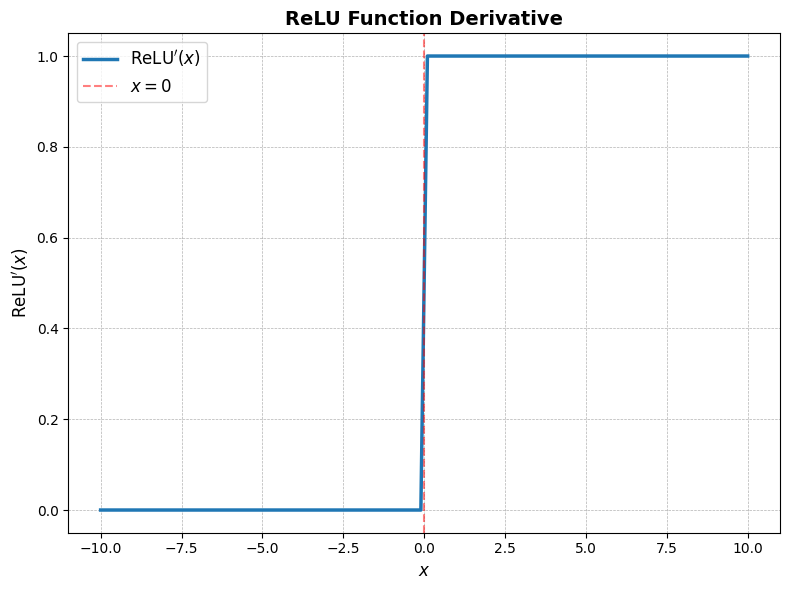

In [6]:
# 定义 ReLU 导数函数
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

dy = relu_derivative(x)

plt.figure(figsize=(8, 6))
plt.plot(x, dy, label=r"$\text{ReLU}'(x)$", linewidth=2.5)
plt.title("ReLU Function Derivative", fontsize=14, fontweight='bold')
plt.xlabel("$x$", fontsize=12)
plt.ylabel(r"$\text{ReLU}'(x)$", fontsize=12)
plt.axvline(0, color='red', linestyle='--', alpha=0.5, label="$x=0$")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 加载数据集
data = load_iris()
X, y = data.data, data.target

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建 MLP 模型，使用 ReLU 激活函数
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# 训练模型
mlp.fit(X_train, y_train)

# 预测测试集
y_pred = mlp.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.4f}")

模型准确率: 0.9867


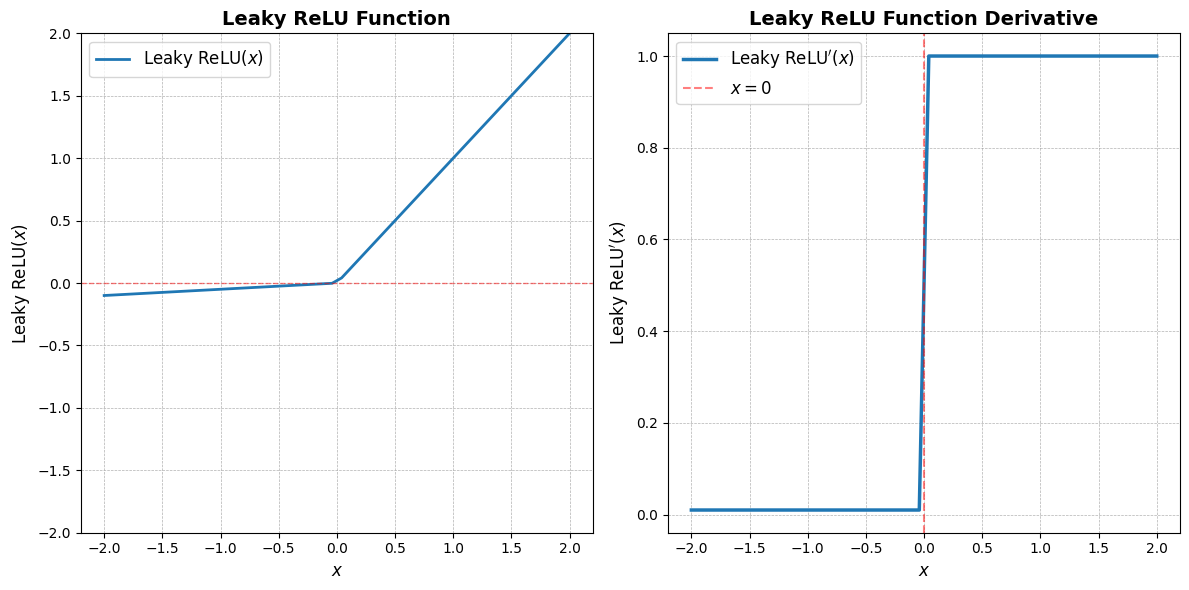

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Leaky ReLU 函数
def leaky_relu(x, alpha=0.05):
    return np.where(x > 0, x, alpha * x)

# 定义 Leaky ReLU 的导数
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# 生成 x 值范围
x = np.linspace(-2, 2, 50)
y = leaky_relu(x)
dy = leaky_relu_derivative(x)

# 绘制 Leaky ReLU 曲线
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label=r'$\text{Leaky ReLU}(x) $',  linewidth=2)
plt.title("Leaky ReLU Function", fontsize=14, fontweight='bold')
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$\text{Leaky ReLU}(x)$", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1)
plt.legend(fontsize=12)
plt.ylim(-2, 2) # 设置 y 轴范围

# 绘制 Leaky ReLU 导数曲线
plt.subplot(1, 2, 2)
plt.plot(x, dy, label=r"$\text{Leaky ReLU}'(x)$", linewidth=2.5)
plt.title("Leaky ReLU Function Derivative", fontsize=14, fontweight='bold')
plt.xlabel("$x$", fontsize=12)
plt.ylabel(r"$\text{Leaky ReLU}'(x)$", fontsize=12)
plt.axvline(0, color='red', linestyle='--', alpha=0.5, label="$x=0$")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(loc='best', fontsize=12)

plt.tight_layout()
plt.show()

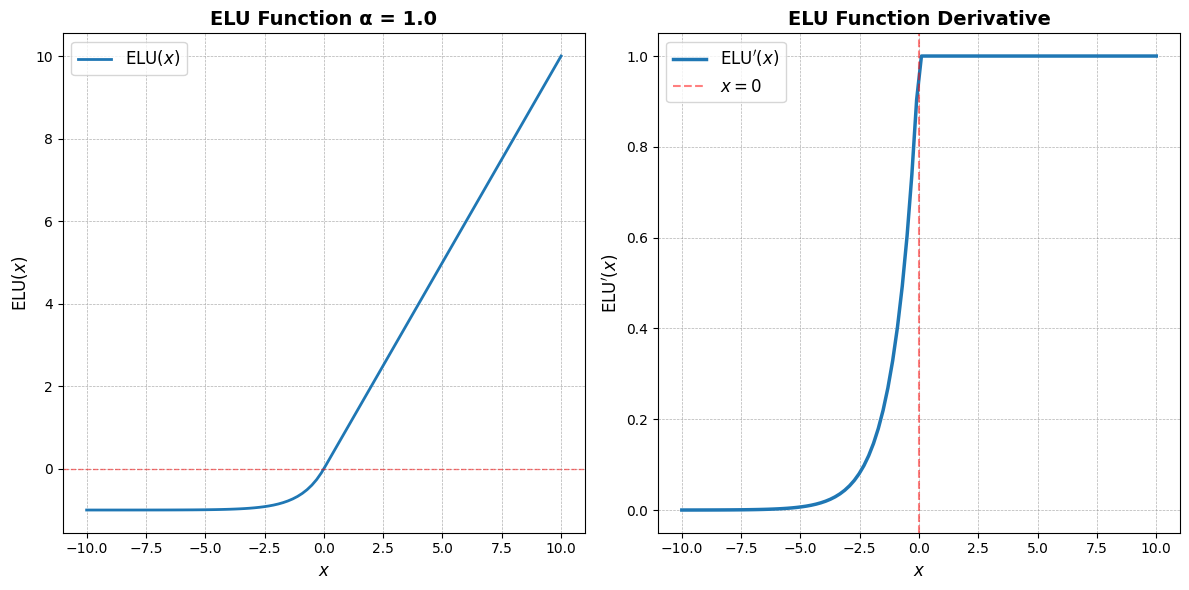

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 ELU 函数
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# 定义 ELU 的导数
def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

# 生成 x 值范围
x = np.linspace(-10, 10, 100)
y = elu(x)
dy = elu_derivative(x)

# 绘制 ELU 曲线
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y, label=r'$\text{ELU}(x)$',  linewidth=2)
plt.title("ELU Function α = 1.0", fontsize=14, fontweight='bold')
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$\text{ELU}(x)$", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='red', linestyle='--', alpha=0.5, linewidth=1)
plt.legend(fontsize=12)

# 绘制 ELU 导数曲线
plt.subplot(1, 2, 2)
plt.plot(x, dy, label=r"$\text{ELU}'(x)$", linewidth=2.5)
plt.title("ELU Function Derivative", fontsize=14, fontweight='bold')
plt.xlabel("$x$", fontsize=12)
plt.ylabel(r"$\text{ELU}'(x)$", fontsize=12)
plt.axvline(0, color='red', linestyle='--', alpha=0.5, label="$x=0$")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(loc='best', fontsize=12)

plt.tight_layout()
plt.show()